# In this sample mobile dataset,
    

### We are having a sample mobile dataset taken from Kaggle, Going to remove the Outliers and Clean the data

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\DS\DataSets\Mobile_dataSet.csv')

In [3]:
df.shape

(28752, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28752 entries, 0 to 28751
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Model   28752 non-null  object 
 1   Mrp     28752 non-null  object 
 2   Rating  28040 non-null  float64
 3   Review  28040 non-null  object 
 4   Specs   28752 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

Model       0
Mrp         0
Rating    712
Review    712
Specs       0
dtype: int64

In [6]:
df.dropna(subset = 'Review', inplace = True)

In [7]:
df.head()

,Model,Mrp,Rating,Review,Specs
0,"Infinix HOT 20 Play (Luna Blue, 64 GB)","₹8,199",4.3,505 Ratings & 52 Reviews,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB
1,"MOTOROLA e40 (Carbon Gray, 64 GB)","₹7,999",4.1,"56,085 Ratings & 5,600 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB
2,"POCO C31 (Shadow Gray, 64 GB)","₹7,499",4.3,"1,83,688 Ratings & 11,185 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB
3,"REDMI 9i Sport (Coral Green, 64 GB)","₹7,199",4.3,"2,09,377 Ratings & 12,027 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)","₹14,999",4.3,"1,37,778 Ratings & 11,213 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB


In [8]:
# Brand is given first so seperating the brand from model
df['Brand'] = df['Model'].apply(lambda x : x.split()[0])
df['Brand'] = df['Brand'].apply(lambda x : str(x).capitalize())
df.head()

,Model,Mrp,Rating,Review,Specs,Brand
0,"Infinix HOT 20 Play (Luna Blue, 64 GB)","₹8,199",4.3,505 Ratings & 52 Reviews,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,Infinix
1,"MOTOROLA e40 (Carbon Gray, 64 GB)","₹7,999",4.1,"56,085 Ratings & 5,600 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,Motorola
2,"POCO C31 (Shadow Gray, 64 GB)","₹7,499",4.3,"1,83,688 Ratings & 11,185 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Poco
3,"REDMI 9i Sport (Coral Green, 64 GB)","₹7,199",4.3,"2,09,377 Ratings & 12,027 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Redmi
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)","₹14,999",4.3,"1,37,778 Ratings & 11,213 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,Samsung


In [9]:
# Removing unwanted words from the Model..Eg (1),(12)
df['Model'] = df['Model'].apply(lambda x : re.sub('\([0-9]\)','',x))
df.head()

,Model,Mrp,Rating,Review,Specs,Brand
0,"Infinix HOT 20 Play (Luna Blue, 64 GB)","₹8,199",4.3,505 Ratings & 52 Reviews,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,Infinix
1,"MOTOROLA e40 (Carbon Gray, 64 GB)","₹7,999",4.1,"56,085 Ratings & 5,600 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,Motorola
2,"POCO C31 (Shadow Gray, 64 GB)","₹7,499",4.3,"1,83,688 Ratings & 11,185 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Poco
3,"REDMI 9i Sport (Coral Green, 64 GB)","₹7,199",4.3,"2,09,377 Ratings & 12,027 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Redmi
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)","₹14,999",4.3,"1,37,778 Ratings & 11,213 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,Samsung


In [10]:
# Inside the Bracket first word is color so writing a function to extract it
def ColorExtract(color):
    tmp = color.split('(')
    if len(tmp) > 1:
        tmp1 = tmp[1].split(',')
        return tmp1[0]
    else:
        return 'No Color'

In [11]:
df['Color'] = df['Model'].apply(lambda x: ColorExtract(x))
df['Color'] = df['Color'].apply(lambda x : str(x).capitalize())
df.head()

,Model,Mrp,Rating,Review,Specs,Brand,Color
0,"Infinix HOT 20 Play (Luna Blue, 64 GB)","₹8,199",4.3,505 Ratings & 52 Reviews,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,Infinix,Luna blue
1,"MOTOROLA e40 (Carbon Gray, 64 GB)","₹7,999",4.1,"56,085 Ratings & 5,600 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,Motorola,Carbon gray
2,"POCO C31 (Shadow Gray, 64 GB)","₹7,499",4.3,"1,83,688 Ratings & 11,185 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Poco,Shadow gray
3,"REDMI 9i Sport (Coral Green, 64 GB)","₹7,199",4.3,"2,09,377 Ratings & 12,027 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Redmi,Coral green
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)","₹14,999",4.3,"1,37,778 Ratings & 11,213 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,Samsung,Aqua blue


In [12]:
# Extracted Brand and color from Model so no need to keep it
df.drop(columns = 'Model', inplace = True)
df.head()

,Mrp,Rating,Review,Specs,Brand,Color
0,"₹8,199",4.3,505 Ratings & 52 Reviews,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,Infinix,Luna blue
1,"₹7,999",4.1,"56,085 Ratings & 5,600 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,Motorola,Carbon gray
2,"₹7,499",4.3,"1,83,688 Ratings & 11,185 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Poco,Shadow gray
3,"₹7,199",4.3,"2,09,377 Ratings & 12,027 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Redmi,Coral green
4,"₹14,999",4.3,"1,37,778 Ratings & 11,213 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,Samsung,Aqua blue


In [13]:
def Price(MRP):
    temp = MRP[1:]
    ls = temp.split(',')
    res = ''.join(ls)
    return int(res)

In [14]:
df['MRP'] = df['Mrp'].apply(lambda x: Price(x))
df.drop(columns = 'Mrp', inplace = True)
df['Rating'] = df['Rating'].astype(float)

In [15]:
df.head()

,Rating,Review,Specs,Brand,Color,MRP
0,4.3,505 Ratings & 52 Reviews,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,Infinix,Luna blue,8199
1,4.1,"56,085 Ratings & 5,600 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,Motorola,Carbon gray,7999
2,4.3,"1,83,688 Ratings & 11,185 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Poco,Shadow gray,7499
3,4.3,"2,09,377 Ratings & 12,027 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Redmi,Coral green,7199
4,4.3,"1,37,778 Ratings & 11,213 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,Samsung,Aqua blue,14999


In [16]:
def RatingCount(Review):
    if Review != np.nan and Review != 'nan':
        temp = str(Review).split()
        ls = str(temp[0]).split(',')
        res = ''.join(ls)
        return int(res)
    else:
        return np.nan
def ReviewCount(Review):
    if Review != np.nan and Review != 'nan':
        temp = str(Review).split()
        ls = str(temp[3]).split(',')
        res = ''.join(ls)
        return int(res)
    else:
        return np.nan

In [17]:
#Taking No of persons given review and rating
df['Rating_count'] = df['Review'].apply(lambda x : RatingCount(x))
df['Review_count'] = df['Review'].apply(lambda x : ReviewCount(x))
df.drop(columns = 'Review', inplace = True)

In [18]:
df.head()

,Rating,Specs,Brand,Color,MRP,Rating_count,Review_count
0,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,Infinix,Luna blue,8199,505,52
1,4.1,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,Motorola,Carbon gray,7999,56085,5600
2,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Poco,Shadow gray,7499,183688,11185
3,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Redmi,Coral green,7199,209377,12027
4,4.3,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,Samsung,Aqua blue,14999,137778,11213


#### Using some different methods to extract RAM, ROM and Expandable upto

In [19]:
def ExtractRam(spec):
    ls = ['1','2','3','4','5','6','7','8','9','0']
    ls1 = []
    if len(spec) > 10:
        a = spec.split('|')
        b = a[0].split()
        for i in b[0]:
            if i in ls:
                ls1.append(i)
            else:
                return 'No Specs'
        fin = ''.join(ls1)
        if b[1].strip() == 'GB':
            return float(fin)
        elif b[1].strip() == 'MB':
            return float(int(fin)/1024)
        else:
            return float(int(fin)*1000)
        return int(b[0])
    else:
        return 'No Specs'  

In [20]:
df['RAM(GB)'] = df['Specs'].apply(lambda x: ExtractRam(x))
df[df['RAM(GB)'] == 'No Specs'] 

,Rating,Specs,Brand,Color,MRP,Rating_count,Review_count,RAM(GB)
18,4.6,128 GB ROM,Apple,Starlight,73990,981,67,No Specs
20,4.6,128 GB ROM,Apple,Midnight,73990,981,67,No Specs
42,4.6,128 GB ROM,Apple,Starlight,73990,981,67,No Specs
44,4.6,128 GB ROM,Apple,Midnight,73990,981,67,No Specs
49,4.6,128 GB ROM,Apple,Blue,73990,981,67,No Specs
...,...,...,...,...,...,...,...,...
28721,4.6,64 GB ROM,Apple,Yellow,39999,176742,10518,No Specs
28724,4.6,128 GB ROM,Apple,Blue,57999,185701,12675,No Specs
28730,4.6,128 GB ROM,Apple,Blue,57999,185701,12675,No Specs
28735,4.7,512 GB ROM,Apple,Blue,83999,177611,9781,No Specs


In [21]:
# Ram is not available for those records so updating those as 4 GB RAM
df[df['RAM(GB)'] == 'No Specs'] = 4
df[df['RAM(GB)'] == 'No Specs']

,Rating,Specs,Brand,Color,MRP,Rating_count,Review_count,RAM(GB)


In [22]:
df['RAM(GB)'] = df['RAM(GB)'].astype(float)
df.head()

,Rating,Specs,Brand,Color,MRP,Rating_count,Review_count,RAM(GB)
0,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,Infinix,Luna blue,8199,505,52,4.0
1,4.1,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,Motorola,Carbon gray,7999,56085,5600,4.0
2,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Poco,Shadow gray,7499,183688,11185,4.0
3,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Redmi,Coral green,7199,209377,12027,4.0
4,4.3,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,Samsung,Aqua blue,14999,137778,11213,6.0


In [23]:
def extract_rom(spec):
    for match in re.finditer(r"(\d+) GB ROM", spec):
        return int(match.group(1))
    for match in re.finditer(r"(\d+) MB ROM",spec):
        return int(match.group(1))/1024
    return 0

In [24]:
df['ROM(GB)'] = df['Specs'].apply(lambda x : extract_rom(str(x)))
df.head()

,Rating,Specs,Brand,Color,MRP,Rating_count,Review_count,RAM(GB),ROM(GB)
0,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,Infinix,Luna blue,8199,505,52,4.0,64.0
1,4.1,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,Motorola,Carbon gray,7999,56085,5600,4.0,64.0
2,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Poco,Shadow gray,7499,183688,11185,4.0,64.0
3,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Redmi,Coral green,7199,209377,12027,4.0,64.0
4,4.3,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,Samsung,Aqua blue,14999,137778,11213,6.0,128.0


In [25]:
def expandable_upto(spec):
    match_gb = re.search(r"Expandable Upto (\d+) GB",spec)
    match_mb = re.search(r"Expandable Upto (\d+) MB",spec)
    match_tb = re.search(r"Expandable Upto (\d+) TB",spec)
    if match_gb:
        return int(match_gb.group(1))
    elif match_mb:
        return float(match_mb.group(1))/1024
    elif match_tb:
        return int(match_tb.group(1))*1000
    else:
        return 0

In [26]:
df['Expandable(GB)'] = df['Specs'].apply(lambda x : expandable_upto(str(x)))
df.drop(columns = 'Specs', inplace = True)
df.head()

,Rating,Brand,Color,MRP,Rating_count,Review_count,RAM(GB),ROM(GB),Expandable(GB)
0,4.3,Infinix,Luna blue,8199,505,52,4.0,64.0,256.0
1,4.1,Motorola,Carbon gray,7999,56085,5600,4.0,64.0,1000.0
2,4.3,Poco,Shadow gray,7499,183688,11185,4.0,64.0,512.0
3,4.3,Redmi,Coral green,7199,209377,12027,4.0,64.0,512.0
4,4.3,Samsung,Aqua blue,14999,137778,11213,6.0,128.0,1000.0


### Setting the mobiles under 5000 and below as Keypad Mobile and Others as SmartPhone 
### 1 - SmartPhone, 0 - Keypad Mobile

In [27]:
df['Mobile_type'] = np.where(df['MRP']<=5000,'Keypad','Smartphone')
df.head()

,Rating,Brand,Color,MRP,Rating_count,Review_count,RAM(GB),ROM(GB),Expandable(GB),Mobile_type
0,4.3,Infinix,Luna blue,8199,505,52,4.0,64.0,256.0,Smartphone
1,4.1,Motorola,Carbon gray,7999,56085,5600,4.0,64.0,1000.0,Smartphone
2,4.3,Poco,Shadow gray,7499,183688,11185,4.0,64.0,512.0,Smartphone
3,4.3,Redmi,Coral green,7199,209377,12027,4.0,64.0,512.0,Smartphone
4,4.3,Samsung,Aqua blue,14999,137778,11213,6.0,128.0,1000.0,Smartphone


# Removing Outliers
## There are less users are having mobile RAM > 8 GB and ROM > 128 GB, so removing those values as outliers

In [28]:
df = df.loc[(df['RAM(GB)'] <= 8) & (df['ROM(GB)'] <= 128)]
df

,Rating,Brand,Color,MRP,Rating_count,Review_count,RAM(GB),ROM(GB),Expandable(GB),Mobile_type
0,4.3,Infinix,Luna blue,8199,505,52,4.00000,64.00000,256.0,Smartphone
1,4.1,Motorola,Carbon gray,7999,56085,5600,4.00000,64.00000,1000.0,Smartphone
2,4.3,Poco,Shadow gray,7499,183688,11185,4.00000,64.00000,512.0,Smartphone
3,4.3,Redmi,Coral green,7199,209377,12027,4.00000,64.00000,512.0,Smartphone
4,4.3,Samsung,Aqua blue,14999,137778,11213,6.00000,128.00000,1000.0,Smartphone
...,...,...,...,...,...,...,...,...,...,...
28746,4.5,Poco,Rosso red,21999,244098,30034,6.00000,64.00000,256.0,Smartphone
28747,4.4,Oppo,Moonlight gold,13999,10827,670,4.00000,128.00000,256.0,Smartphone
28748,4.3,Tecno,Atlantic blue,9280,8,0,4.00000,64.00000,512.0,Smartphone
28749,4.0,Kechaoda,No color,1270,112,5,0.03125,0.03125,0.0,Keypad


In [29]:
df.isna().sum()

Rating            0
Brand             0
Color             0
MRP               0
Rating_count      0
Review_count      0
RAM(GB)           0
ROM(GB)           0
Expandable(GB)    0
Mobile_type       0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27590 entries, 0 to 28750
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          27590 non-null  float64
 1   Brand           27590 non-null  object 
 2   Color           27590 non-null  object 
 3   MRP             27590 non-null  int64  
 4   Rating_count    27590 non-null  int64  
 5   Review_count    27590 non-null  int64  
 6   RAM(GB)         27590 non-null  float64
 7   ROM(GB)         27590 non-null  float64
 8   Expandable(GB)  27590 non-null  float64
 9   Mobile_type     27590 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 2.3+ MB


# Plotting

In [31]:
df.head()

,Rating,Brand,Color,MRP,Rating_count,Review_count,RAM(GB),ROM(GB),Expandable(GB),Mobile_type
0,4.3,Infinix,Luna blue,8199,505,52,4.0,64.0,256.0,Smartphone
1,4.1,Motorola,Carbon gray,7999,56085,5600,4.0,64.0,1000.0,Smartphone
2,4.3,Poco,Shadow gray,7499,183688,11185,4.0,64.0,512.0,Smartphone
3,4.3,Redmi,Coral green,7199,209377,12027,4.0,64.0,512.0,Smartphone
4,4.3,Samsung,Aqua blue,14999,137778,11213,6.0,128.0,1000.0,Smartphone


In [32]:
df_rating = df.groupby('Rating').sum('Rating_count')
df_rating

,MRP,Rating_count,Review_count,RAM(GB),ROM(GB),Expandable(GB)
Rating,,,,,,
2.7,518229,213,0,213.000000,2272.000000,3.635200e+04
3.3,56582,1476630,119475,2.531250,2.531250,0.000000e+00
3.4,29940,240,0,0.937500,0.937500,4.800000e+02
3.5,167205,1892,134,60.781250,1281.125000,3.520000e+02
3.6,223553,597775,54764,7.375000,7.375000,0.000000e+00
3.7,715400,1661639,198397,247.830078,3907.830078,6.100000e+04
3.8,1079850,541497,50802,295.689453,4616.376953,2.998400e+04
3.9,1197330,5763780,521410,125.828125,1506.707031,1.488000e+04
4.0,7428521,7055432,677070,9772.902344,36758.925781,1.114102e+05


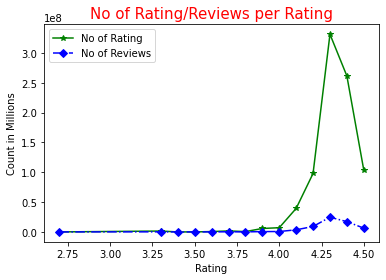

In [33]:
plt.plot(df_rating.index,df_rating['Rating_count'],marker = '*',color = 'green',label = 'No of Rating')
plt.plot(df_rating.index,df_rating['Review_count'],'bD-.',label = 'No of Reviews')
plt.title('No of Rating/Reviews per Rating',color = '#ff0000',fontsize = 15)
plt.xlabel('Rating')
plt.ylabel('Count in Millions')
plt.legend()
plt.show()

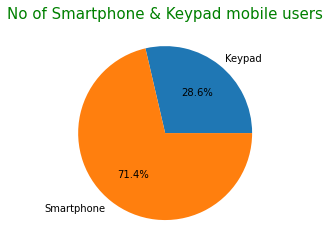

In [34]:
df_pie = df.groupby('Mobile_type').count()
plt.pie(df_pie['Rating'],labels = df_pie.index,startangle = 0,autopct = '%1.1f%%')
plt.title('No of Smartphone & Keypad mobile users',color = 'green',fontsize = 15)
plt.show()

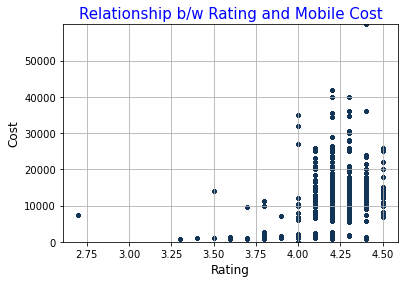

In [35]:
# Plotting the Rating and Mobile Price as Scatter Plot
plt.scatter(df['Rating'],df['MRP'],s = 10, c= '#123456')
plt.title('Relationship b/w Rating and Mobile Cost',color = 'blue',fontsize = 15)
plt.xlabel('Rating',fontsize = 12)
plt.ylabel('Cost',fontsize = 12)
plt.ylim(0,df['MRP'].max())
plt.grid()
plt.show()

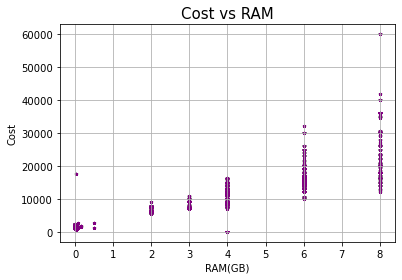

In [36]:
plt.scatter(df['RAM(GB)'],df['MRP'],color = '#800080',marker = '*',s = 5)
plt.title('Cost vs RAM',fontsize = 15)
plt.xlabel('RAM(GB)')
plt.ylabel('Cost')
plt.grid()
plt.show()

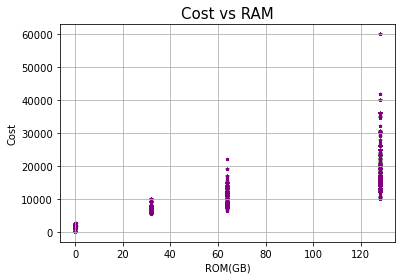

In [37]:
plt.scatter(df['ROM(GB)'],df['MRP'],color = '#800080',marker = '*',s = 5)
plt.title('Cost vs RAM',fontsize = 15)
plt.xlabel('ROM(GB)')
plt.ylabel('Cost')
plt.grid()
plt.show()

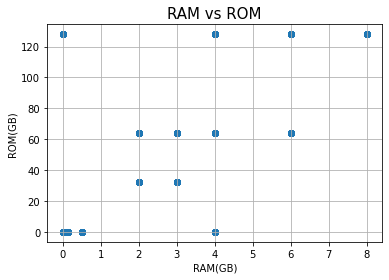

In [38]:
plt.scatter(df['RAM(GB)'],df['ROM(GB)'])
plt.title('RAM vs ROM',fontsize = 15)
plt.xlabel('RAM(GB)')
plt.ylabel('ROM(GB)')
plt.grid()
plt.show()

In [39]:
df.head()

,Rating,Brand,Color,MRP,Rating_count,Review_count,RAM(GB),ROM(GB),Expandable(GB),Mobile_type
0,4.3,Infinix,Luna blue,8199,505,52,4.0,64.0,256.0,Smartphone
1,4.1,Motorola,Carbon gray,7999,56085,5600,4.0,64.0,1000.0,Smartphone
2,4.3,Poco,Shadow gray,7499,183688,11185,4.0,64.0,512.0,Smartphone
3,4.3,Redmi,Coral green,7199,209377,12027,4.0,64.0,512.0,Smartphone
4,4.3,Samsung,Aqua blue,14999,137778,11213,6.0,128.0,1000.0,Smartphone


In [40]:
df_brand = df.groupby('Brand',sort = True).count()
df_brand.tail()

,Rating,Color,MRP,Rating_count,Review_count,RAM(GB),ROM(GB),Expandable(GB),Mobile_type
Brand,,,,,,,,,
Samsung,2091,2091,2091,2091,2091,2091,2091,2091,2091
Snexian,205,205,205,205,205,205,205,205,205
Tecno,606,606,606,606,606,606,606,606,606
Vivo,1592,1592,1592,1592,1592,1592,1592,1592,1592
Xiaomi,88,88,88,88,88,88,88,88,88


In [41]:
df_brand[df_brand['Rating'] == df_brand['Rating'].max()]

,Rating,Color,MRP,Rating_count,Review_count,RAM(GB),ROM(GB),Expandable(GB),Mobile_type
Brand,,,,,,,,,
Realme,4210,4210,4210,4210,4210,4210,4210,4210,4210


In [42]:
df_brand[df_brand['Rating'] == df_brand['Rating'].min()]

,Rating,Color,MRP,Rating_count,Review_count,RAM(GB),ROM(GB),Expandable(GB),Mobile_type
Brand,,,,,,,,,
Mi,11,11,11,11,11,11,11,11,11


## From the Above Analysis

    In the given sample dataset,
        1. Most used Brand is Realme and least used Brand is Mi.
        2. RAM and ROM were holding a big place to determine the Mobile cost.
        3. RAM and ROM were positively Correlated
        3. Rating is not used to determine the mobile cost.
        4. Still 28% of people are using keypad mobile.